## 1. Setup and load data

### 1.1 Install Dependencies and setup

In [151]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
%pip list

Package                      VersionNote: you may need to restart the kernel to use updated packages.

---------------------------- --------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.5.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.40.0
gast                         0.4.0
google-auth                  2.21.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.56.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.23.3
ipython    


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [153]:
import tensorflow as tf
import os

### 1.2 Remove dodgy images

In [154]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [155]:
data_dir = 'Data'

In [156]:
image_exts = ['jpeg','jpg','bmp','png']

In [157]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### 1.3 Load Data

In [158]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [159]:
import numpy as np
from matplotlib import pyplot as plt

In [160]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 170 files belonging to 2 classes.


In [161]:
data_iterator = data.as_numpy_iterator()

In [162]:
batch = data_iterator.next()

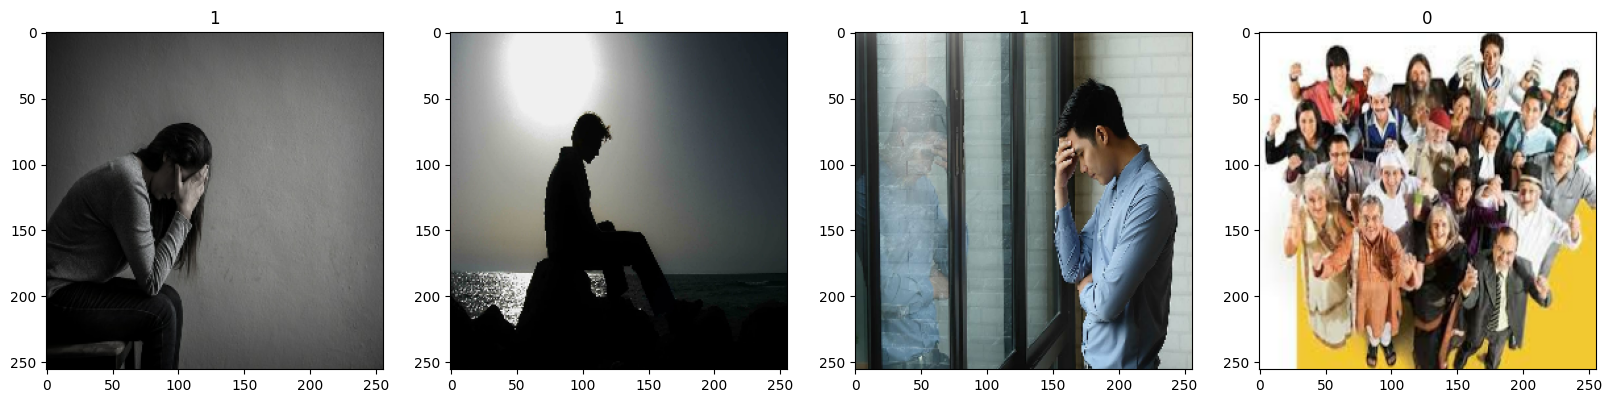

In [163]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocess Data

### 2.1 Scale Data

In [164]:
data = data.map(lambda x, y: (x/255, y))

In [165]:
scaled_iterator = data.as_numpy_iterator()

In [166]:
batch = scaled_iterator.next()

In [167]:
batch[0].max()

1.0

### 2.2 Split Data

In [168]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [169]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [170]:
len(test)

1

## 3. Deep Model

### 3.1 Build Deep Learning Model

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [172]:
model = Sequential()

In [173]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [174]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [175]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

### 3.2 Train Model

In [176]:
logdir = 'logs'

In [177]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [178]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25


3/3 [==============================] - 12s 3s/step - loss: 0.8478 - accuracy: 0.5833 - val_loss: 0.7718 - val_accuracy: 0.3750
Epoch 2/25
3/3 [==============================] - 9s 3s/step - loss: 0.7023 - accuracy: 0.4896 - val_loss: 0.5944 - val_accuracy: 0.5938
Epoch 3/25
3/3 [==============================] - 9s 3s/step - loss: 0.6131 - accuracy: 0.5938 - val_loss: 0.6099 - val_accuracy: 0.6094
Epoch 4/25
3/3 [==============================] - 10s 3s/step - loss: 0.5555 - accuracy: 0.6562 - val_loss: 0.5178 - val_accuracy: 0.7812
Epoch 5/25
3/3 [==============================] - 9s 3s/step - loss: 0.5570 - accuracy: 0.7396 - val_loss: 0.5052 - val_accuracy: 0.8750
Epoch 6/25
3/3 [==============================] - 10s 3s/step - loss: 0.5256 - accuracy: 0.8021 - val_loss: 0.4893 - val_accuracy: 0.6875
Epoch 7/25
3/3 [==============================] - 10s 3s/step - loss: 0.5237 - accuracy: 0.6667 - val_loss: 0.4485 - val_accuracy: 0.8438
Epoch 8/25
3/3 [==============================] 

### 3.3 Plot Performance

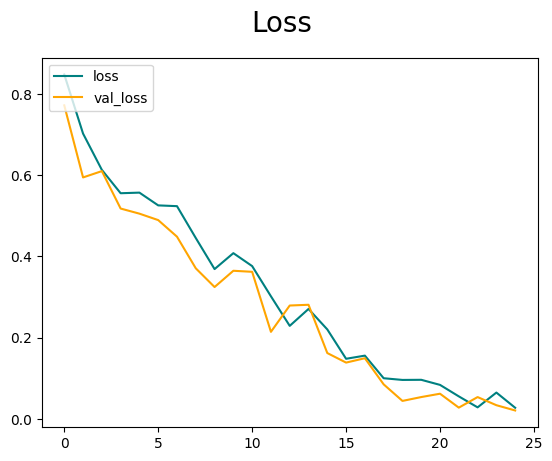

In [179]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

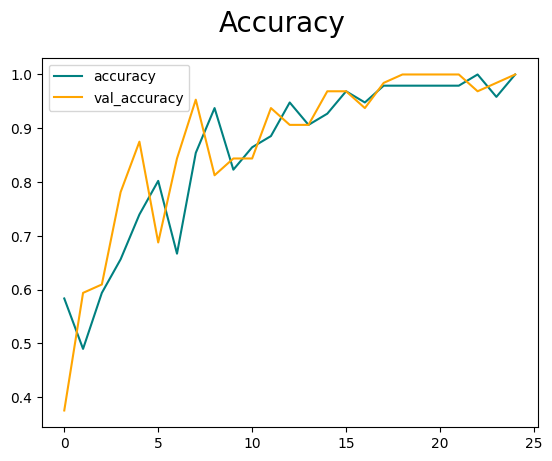

In [180]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4. Evaluate Performance

### 4.1 Evaluate

In [181]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [182]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [183]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 220ms/step


In [184]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


### 4.2 Test

In [185]:
import cv2

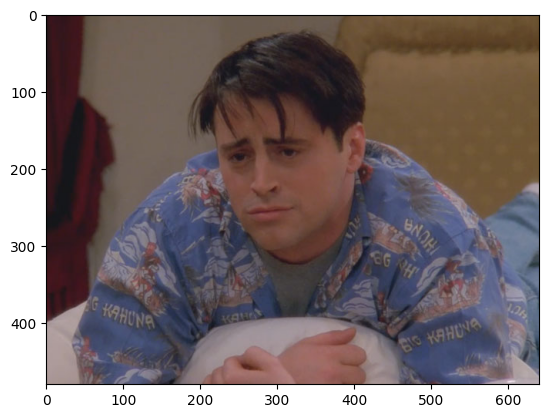

In [194]:
img = cv2.imread('sadtest.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

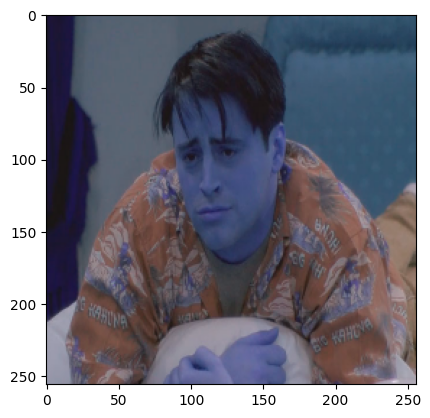

In [195]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [196]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 99ms/step


In [197]:
if yhat > 0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Sad


## 5. Save the Model

### 5.1 Save the Model

In [199]:
from tensorflow.keras.models import load_model

In [200]:
model.save(os.path.join('models','binary classifier.h5'))

d:\PROJECTS\Deep Learning projects\Image Classifier\imageclassification\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
